# Point Of Interest Detection

In [9]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

### Algorithms

In [10]:
def harris_formula(src, wsize, k, threshold):
    """ Finds corners in an image using Harris Detector (without using convolution with      a Gaussian mask).
    ----------
    Input
    src: numpy array
        Input grayscaled image.
    wsize: int
        Size of neighbourhood considered for corner detection.
    k: float
        Harris detector free parameter in the equation.
    threshold: float
        Threshold beyond which the existence of a corner is considered.
    ----------
    Output
    dst: numpy array
        Image with POI (white), other pixels are black
    """
    height = src.shape[0]
    width = src.shape[1]
    # initializes the destination image
    dst = np.zeros((height, width))
    # sobel masks
    Sx = np.array([
        [1, 0, -1],
        [2, 0, -2],
        [1, 0, -1]
    ])
    Sy = np.array([
        [1, 2, 1],
        [0, 0, 0],
        [-1, -2, -1]
    ])
    # finds derivatives on x and y axis
    Ix = np.absolute(cv2.filter2D(src, -1, Sx))
    Iy = np.absolute(cv2.filter2D(src, -1, Sy))
    Ixx = Ix**2
    Ixy = Ix*Iy
    Iyy = Iy**2

    offset = wsize//2
    for y in range(offset, height-offset):
        for x in range(offset, width-offset):
            # gets the square x derivative for the W window
            Wxx = Ixx[y-offset:y+offset+1, x-offset:x+offset+1]
            # gets the product of x and y derivatives for the W window
            Wxy = Ixy[y-offset:y+offset+1, x-offset:x+offset+1]
            # gets the square y derivative for the W window
            Wyy = Iyy[y-offset:y+offset+1, x-offset:x+offset+1]
            # computes the sums.
            Mxx = Wxx.sum()
            Mxy = Wxy.sum()
            Myy = Wyy.sum()
            # computes determinant and trace
            det = (Mxx * Myy) - (Mxy**2)
            trace = Mxx + Myy
            # computes Harris response
            response = det - k*(trace**2)
            # if corner response is over threshold
            dst[y][x] = response
    
    dst[dst <= threshold * dst.max()]=0
    dst[dst > threshold * dst.max()]=1

    return dst

In [11]:
def create_square(size_bg, size_sq, pos):
    img = np.zeros(size_bg)
    img[pos[0]:pos[0]+size_sq[0], pos[1]:pos[1]+size_sq[1]] = np.ones(size_sq)
    return img

In [12]:
def detects_edges(img, mask_v, mask_h, threshold):
    v_img = np.absolute(cv2.filter2D(img, -1, mask_v))
    v_img = (v_img - v_img.min())/(v_img.max() - v_img.min())
    v_img[v_img >= threshold] = 1
    v_img[v_img < threshold] = 0

    h_img = np.absolute(cv2.filter2D(img, -1, mask_h))
    h_img = (h_img - h_img.min())/(h_img.max() - h_img.min())
    h_img[h_img >= threshold] = 1
    h_img[h_img < threshold] = 0

    output_img = np.sqrt(h_img**2 + v_img**2)
    output_img = output_img.astype(np.float64)

    return output_img

## Task : detect POI with Harris detector (without convolution with a Gaussian mask)

**1.1** Write a program that detects POI from an original image (for example the square from project 1)

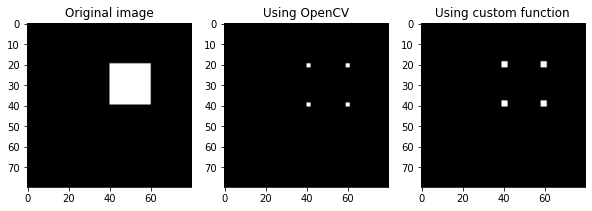

In [13]:
# Image
img = create_square((80,80),(20,20),(20,40))
# harris detection using open cv
output = cv2.cornerHarris(img.astype(np.uint8) , 2,3,0.05)
output[output>0.01*output.max()]=1
# harris detection using custom function
dst = harris_formula(img.astype(np.float32), wsize=2, k=0.05, threshold=0.01)

fig, axs = plt.subplots(1, 3, figsize=(10, 10))

axs[0].set_title("Original image")
axs[0].imshow(img, cmap=plt.cm.gray)
axs[1].set_title("Using OpenCV")
axs[1].imshow(output, cmap=plt.cm.gray)
axs[2].set_title("Using custom function")
axs[2].imshow(dst, cmap=plt.cm.gray)

plt.show()

**1.2** Write a program that detects POI from the borders of an original image

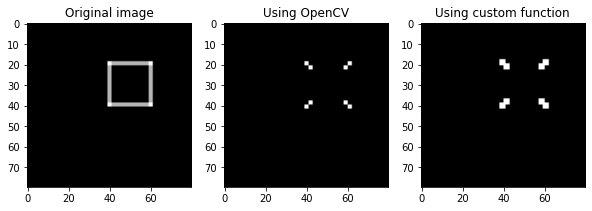

In [14]:
prewitt_v_mask = np.array([
    [1, 0, -1],
    [1, 0, -1],
    [1, 0, -1]
])
prewitt_h_mask = np.array([
    [1, 1, 1],
    [0, 0, 0],
    [-1, -1, -1]
])
img = create_square((80,80),(20,20),(20,40))
edges_img = detects_edges(img, prewitt_v_mask, prewitt_h_mask, 0.2)

output = cv2.cornerHarris(edges_img.astype(np.uint8) , 2,3,0.05)
output[output>0.01*output.max()]=1

dst = harris_formula(edges_img.astype(np.float32), wsize=2, k=0.05, threshold=0.01)

fig, axs = plt.subplots(1, 3, figsize=(10, 10))

axs[0].set_title("Original image")
axs[0].imshow(edges_img, cmap=plt.cm.gray)
axs[1].set_title("Using OpenCV")
axs[1].imshow(output, cmap=plt.cm.gray)
axs[2].set_title("Using custom function")
axs[2].imshow(dst, cmap=plt.cm.gray)

plt.show()

**1.3** What do you observe between **1.1** and **1.2** ? Explain.

*Answer* : There are 4 POI for **1.1** and 8 for **1.2**, maybe this difference is caused by the inner black square for the latter one.

**1.4** Redo **1.1**, **1.2** and **1.3** with a test image ('lena.jpg')

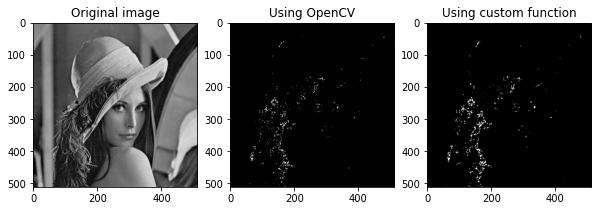

In [16]:
# Image
img = cv2.imread("./data/lena.jpg", cv2.COLOR_BGR2GRAY)
# harris detection using open cv
output = cv2.cornerHarris(img.astype(np.uint8) , 2,3,0.05)
output[output>0.01*output.max()]=1
# harris detection using custom function
dst = harris_formula(img.astype(np.float32), wsize=2, k=0.05, threshold=0.01)

fig, axs = plt.subplots(1, 3, figsize=(10, 10))

axs[0].set_title("Original image")
axs[0].imshow(img, cmap=plt.cm.gray)
axs[1].set_title("Using OpenCV")
axs[1].imshow(output, cmap=plt.cm.gray)
axs[2].set_title("Using custom function")
axs[2].imshow(dst, cmap=plt.cm.gray)

plt.show()

**1.5** Explain the results

*Answer* : the higher the threshold, the fewer the POIs

**1.6** Comment the results after taking differents values of lambda and explain the results

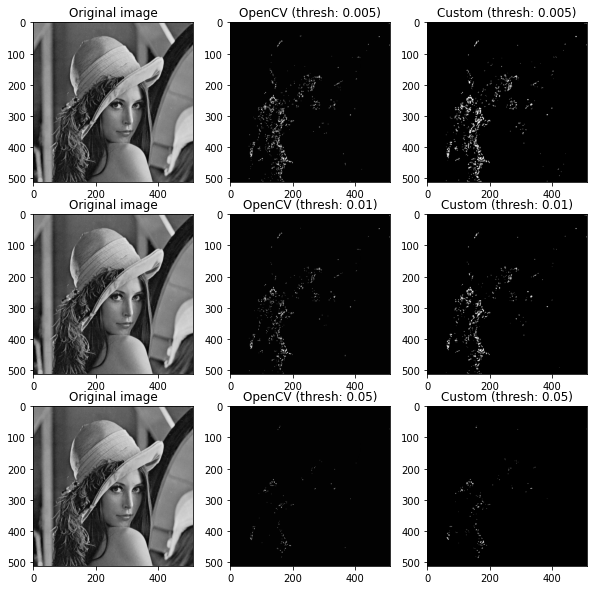

In [17]:
# Image
img = cv2.imread("./data/lena.jpg", cv2.COLOR_BGR2GRAY)

fig, axs = plt.subplots(3, 3, figsize=(10, 10))

for i, thresh in enumerate([0.005, 0.01, 0.05]):
    # harris detection using open cv
    output = cv2.cornerHarris(img.astype(np.uint8) , 2,3,0.05)
    output[output>thresh*output.max()]=1
    # harris detection using custom function
    dst = harris_formula(img.astype(np.float32), wsize=2, k=0.05, threshold=thresh)

    axs[i][0].set_title("Original image")
    axs[i][0].imshow(img, cmap=plt.cm.gray)
    axs[i][1].set_title(f"OpenCV (thresh: {thresh})")
    axs[i][1].imshow(output, cmap=plt.cm.gray)
    axs[i][2].set_title(f"Custom (thresh: {thresh})")
    axs[i][2].imshow(dst, cmap=plt.cm.gray)